Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
#Importing the data
data = pd.read_csv("data.csv")
data.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,1,37.0,79.46339,0,1,0.0,100.0,0.0,1.0,...,1,2,0,1,0,322,469,882,754,1
1,324,0,33.0,73.02314,0,1,0.0,90.0,0.0,1.0,...,1,3,1,1,1,168,575,1035,1525,1
2,495,1,43.0,69.47793,0,1,0.0,100.0,0.0,1.0,...,1,1,0,0,0,377,333,1147,1088,1
3,1201,3,42.0,89.15934,0,1,0.0,100.0,1.0,1.0,...,1,3,0,0,0,238,324,775,1019,1
4,934,0,37.0,137.46581,0,1,0.0,100.0,0.0,0.0,...,0,3,0,0,1,500,443,1601,849,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50046 entries, 0 to 50045
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      50046 non-null  int64  
 1   trt       50046 non-null  int64  
 2   age       50036 non-null  float64
 3   wtkg      50035 non-null  float64
 4   hemo      50046 non-null  int64  
 5   homo      50046 non-null  int64  
 6   drugs     50044 non-null  float64
 7   karnof    50043 non-null  float64
 8   oprior    50045 non-null  float64
 9   z30       50045 non-null  float64
 10  preanti   50046 non-null  int64  
 11  race      50044 non-null  float64
 12  gender    50046 non-null  int64  
 13  str2      50046 non-null  int64  
 14  strat     50046 non-null  int64  
 15  symptom   50046 non-null  int64  
 16  treat     50046 non-null  int64  
 17  offtrt    50046 non-null  int64  
 18  cd40      50046 non-null  int64  
 19  cd420     50046 non-null  int64  
 20  cd80      50046 non-null  in

In [4]:
data.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,50046.000000,50046.000000,50036.000000,50035.000000,50046.000000,50046.000000,50044.000000,50043.000000,50045.000000,50045.000000,...,50046.000000,50046.000000,50046.000000,50046.000000,50046.000000,50046.000000,50046.000000,50046.000000,50046.000000,50046.000000
mean,877.398074,1.384746,34.163522,75.861869,0.033469,0.653499,0.132184,96.831505,0.042302,0.640843,...,0.575191,1.936399,0.083503,0.734185,0.342025,319.088419,438.058446,1045.994045,905.917216,0.310155
std,307.284582,1.233323,7.090442,12.028666,0.179860,0.475860,0.338694,5.092175,0.201279,0.479758,...,0.494319,0.895327,0.276644,0.441771,0.474393,102.537837,144.798655,488.618765,339.653003,0.462561
min,66.000000,0.000000,12.000000,42.361620,0.000000,0.000000,0.000000,76.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,81.000000,96.000000,173.000000,0.000000
25%,542.000000,0.000000,29.000000,68.252895,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,236.000000,327.000000,713.000000,649.000000,0.000000
50%,1045.000000,1.000000,34.000000,74.054050,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,299.000000,415.000000,885.000000,858.000000,0.000000
75%,1136.000000,3.000000,39.000000,81.142845,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,396.000000,531.000000,1245.000000,1084.000000,1.000000
max,1231.000000,3.000000,68.000000,149.830870,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,930.000000,1119.000000,4656.000000,3538.000000,1.000000


In [5]:
data.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'homo', 'drugs', 'karnof',
       'oprior', 'z30', 'preanti', 'race', 'gender', 'str2', 'strat',
       'symptom', 'treat', 'offtrt', 'cd40', 'cd420', 'cd80', 'cd820',
       'infected'],
      dtype='object')

In [6]:
#Checking for null values
print(data.isnull().sum())
df = data
df.shape

time         0
trt          0
age         10
wtkg        11
hemo         0
homo         0
drugs        2
karnof       3
oprior       1
z30          1
preanti      0
race         2
gender       0
str2         0
strat        0
symptom      0
treat        0
offtrt       0
cd40         0
cd420        0
cd80         0
cd820        0
infected     0
dtype: int64


(50046, 23)

In [7]:
#Filling null values
col1 = ["age","wtkg","karnof"]
for i in col1:
    df = df.fillna(value = {i:df[i].mean()})

col =["drugs", "oprior", "z30", "race"]
for i in col:
    df = df.fillna(value = {i:df[i].mode()[0]})
df.isnull().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

In [8]:
#Finding duplicates
df.duplicated().sum()

46

In [9]:
#Droping duplicate values
df = df.drop_duplicates(keep = "first")
df

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,1,37.0,79.46339,0,1,0.0,100.0,0.0,1.0,...,1,2,0,1,0,322,469,882,754,1
1,324,0,33.0,73.02314,0,1,0.0,90.0,0.0,1.0,...,1,3,1,1,1,168,575,1035,1525,1
2,495,1,43.0,69.47793,0,1,0.0,100.0,0.0,1.0,...,1,1,0,0,0,377,333,1147,1088,1
3,1201,3,42.0,89.15934,0,1,0.0,100.0,1.0,1.0,...,1,3,0,0,0,238,324,775,1019,1
4,934,0,37.0,137.46581,0,1,0.0,100.0,0.0,0.0,...,0,3,0,0,1,500,443,1601,849,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,953,3,46.0,61.28204,0,0,0.0,90.0,0.0,1.0,...,1,3,0,1,1,234,402,481,1014,0
49996,1036,0,42.0,73.36768,0,1,0.0,100.0,0.0,1.0,...,1,3,0,0,1,369,575,514,657,0
49997,1157,0,40.0,78.75824,0,1,0.0,100.0,0.0,1.0,...,1,1,0,1,0,308,663,1581,863,0
49998,596,0,31.0,52.20371,0,0,0.0,100.0,0.0,1.0,...,1,1,0,1,1,349,440,470,865,1


In [10]:
df.duplicated().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

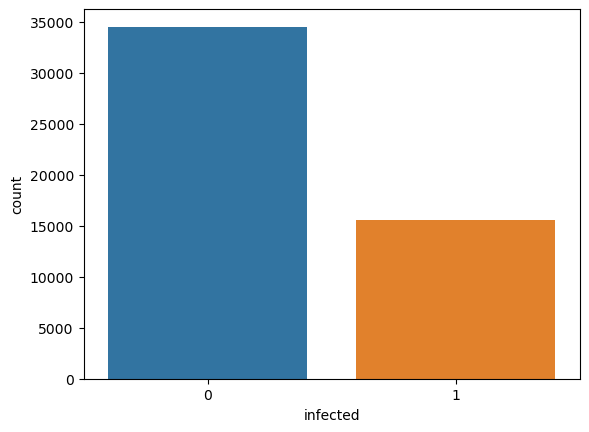

In [11]:
#Analyzing outcomes
sns.countplot(df['infected'],label="Count")
plt.show

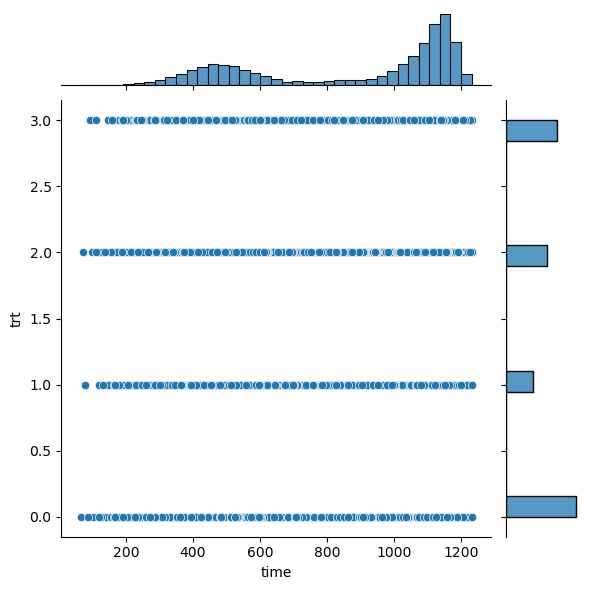

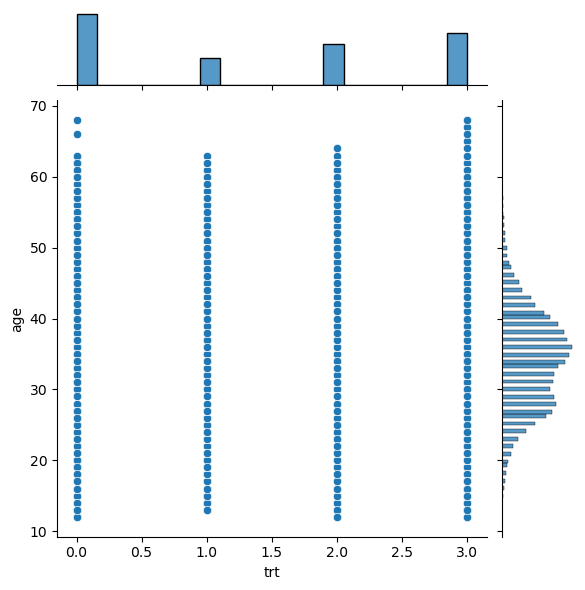

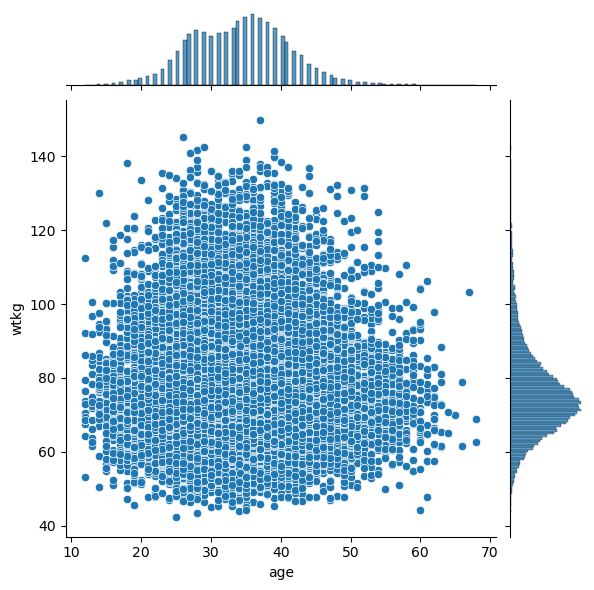

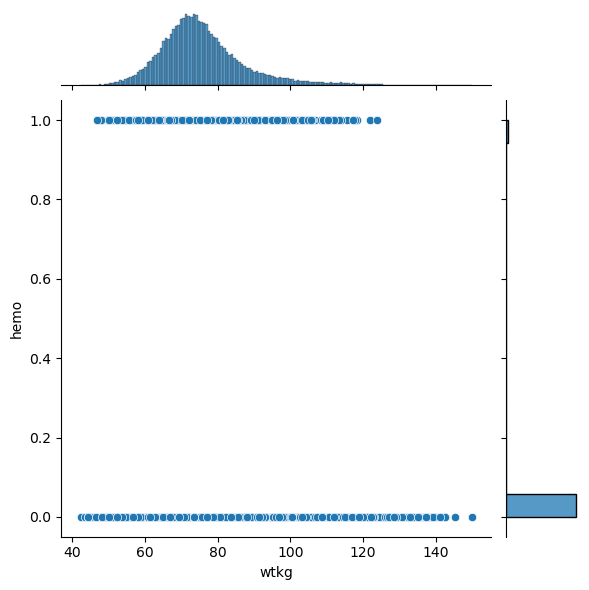

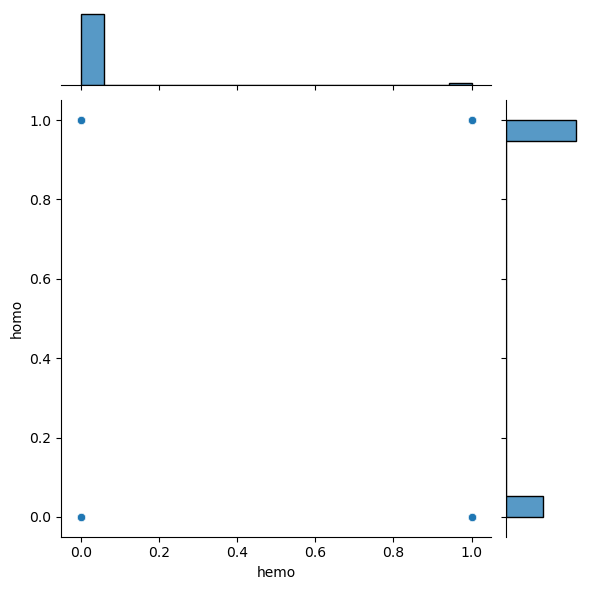

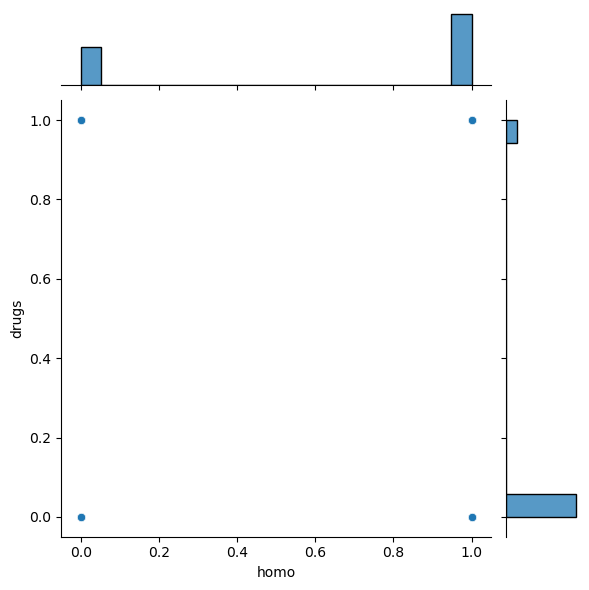

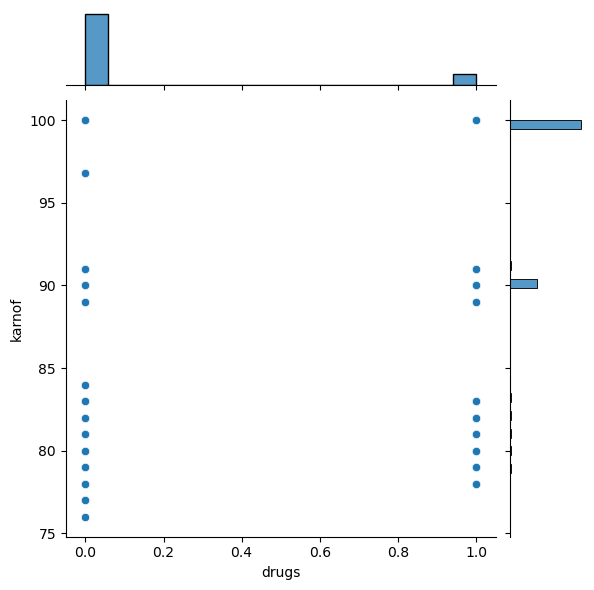

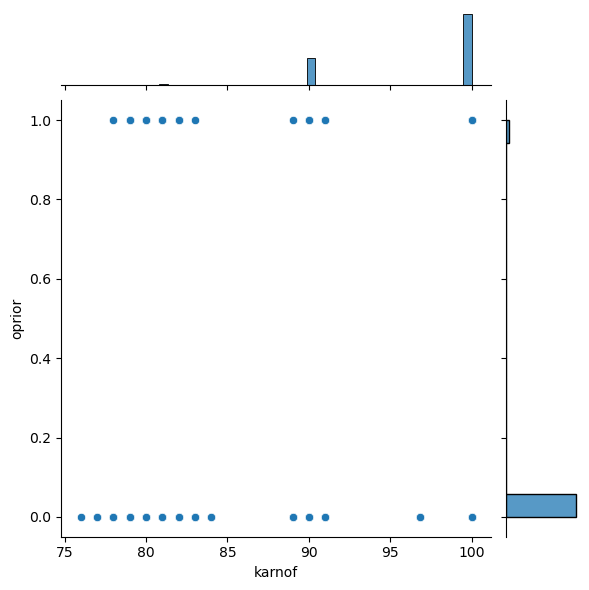

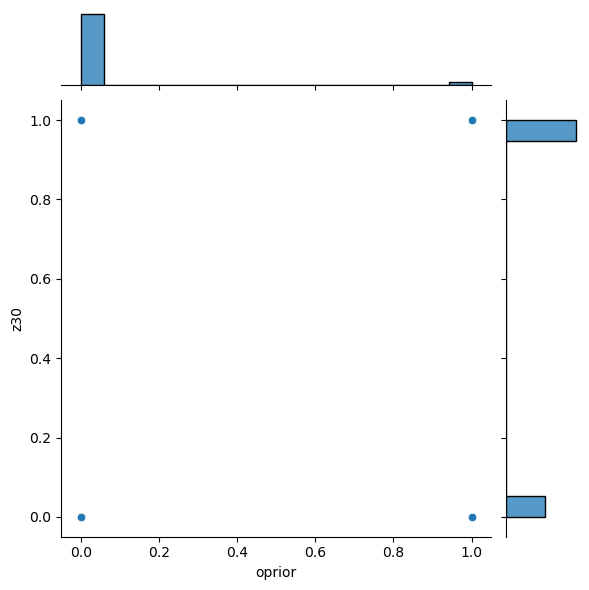

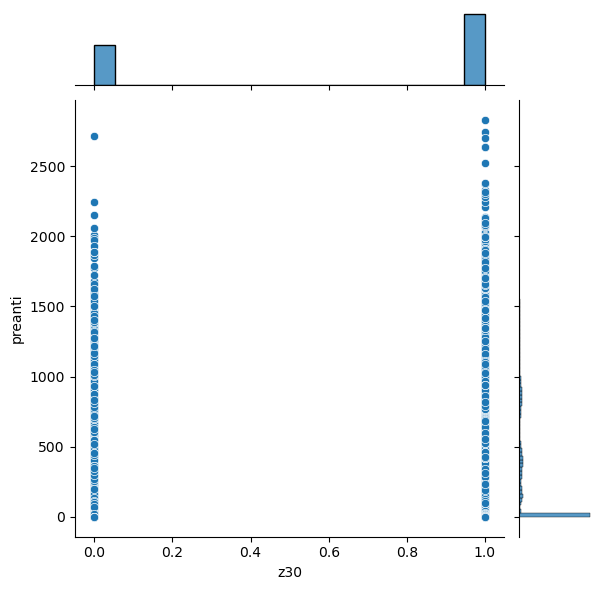

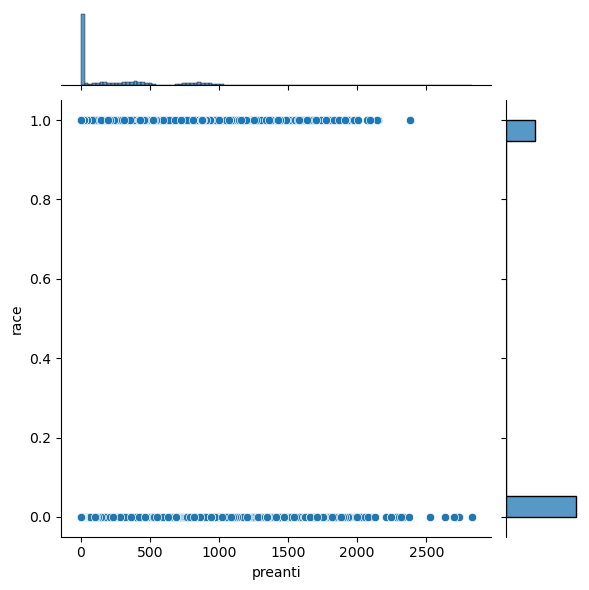

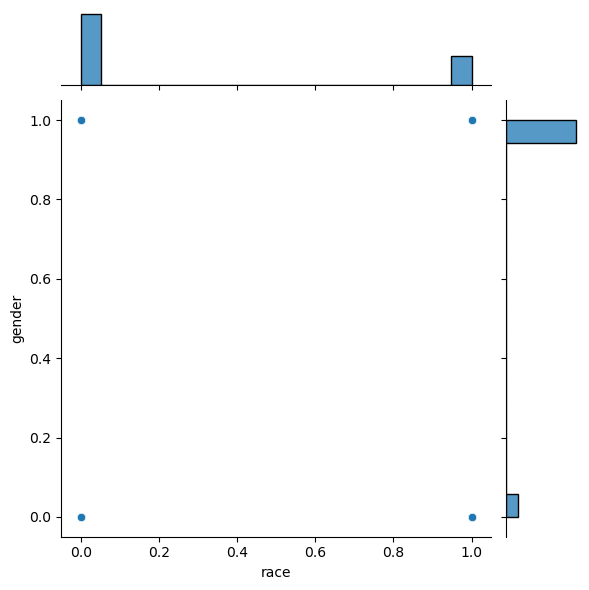

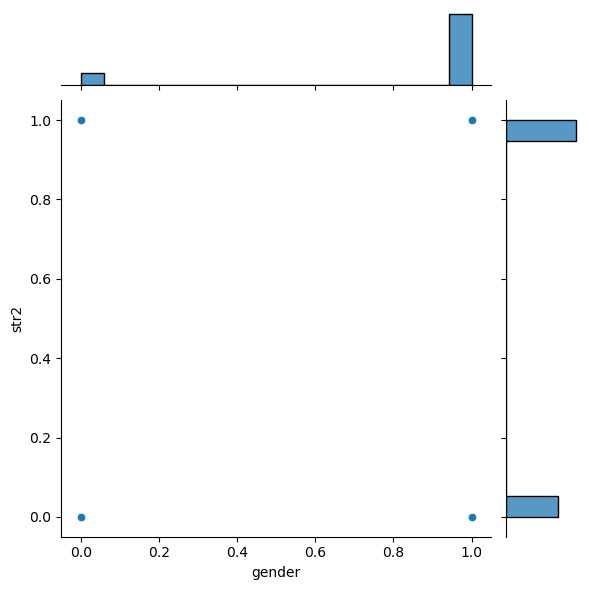

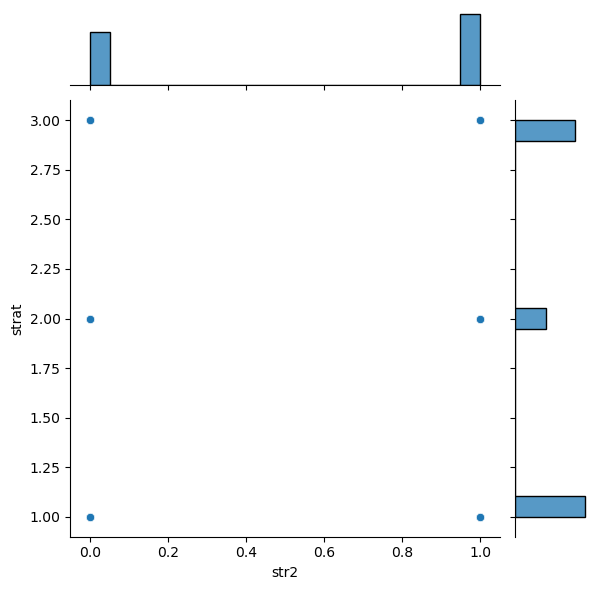

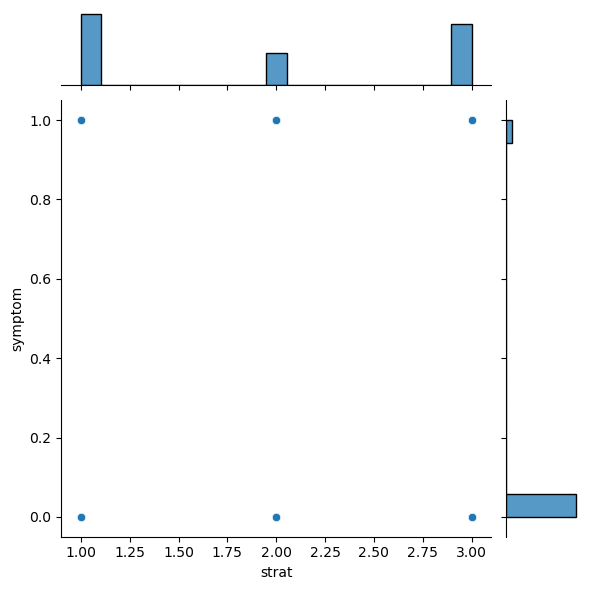

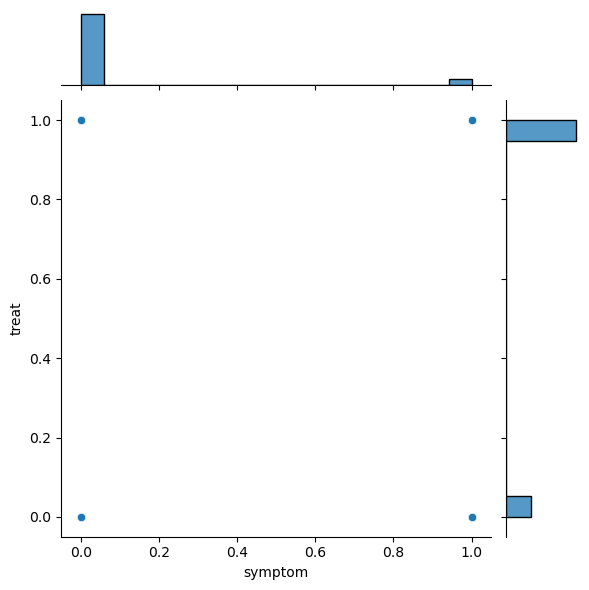

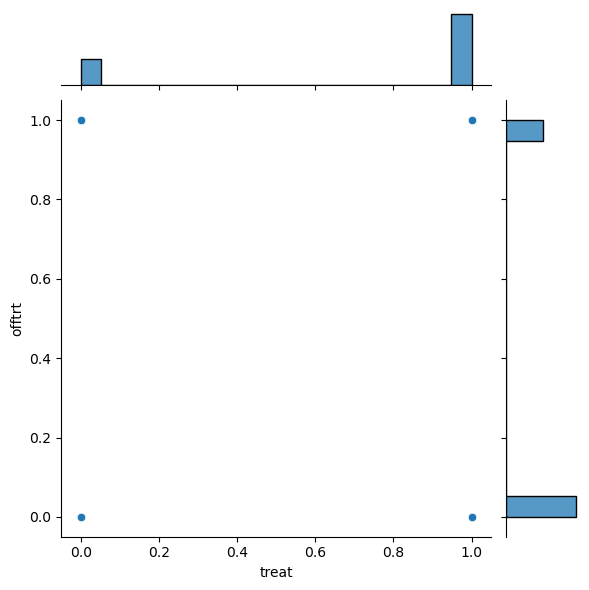

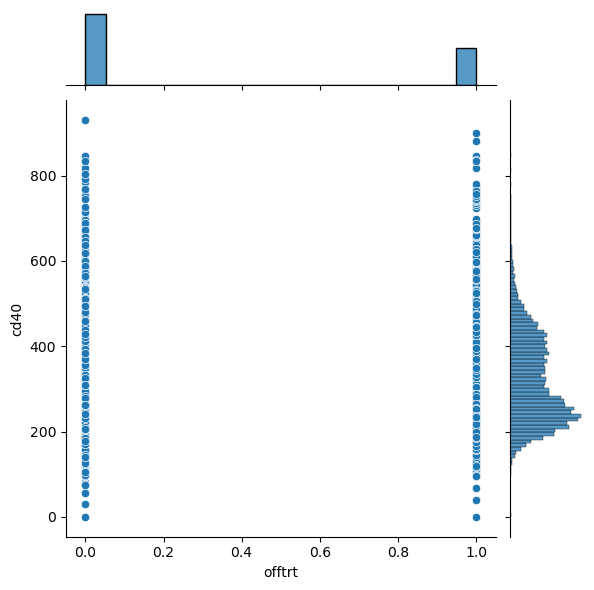

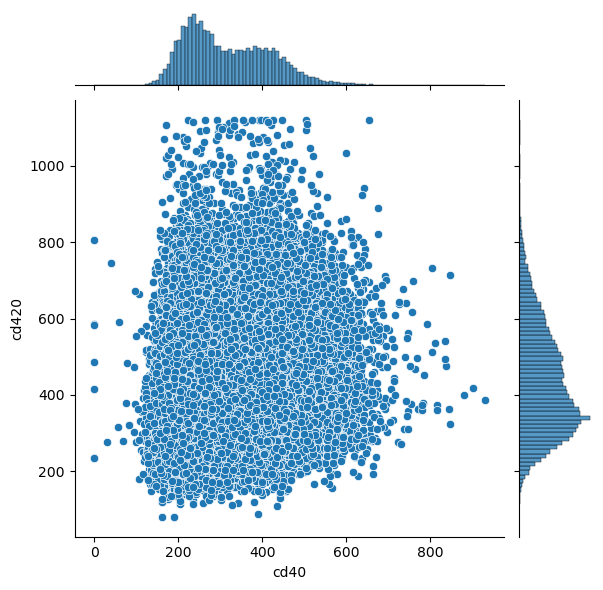

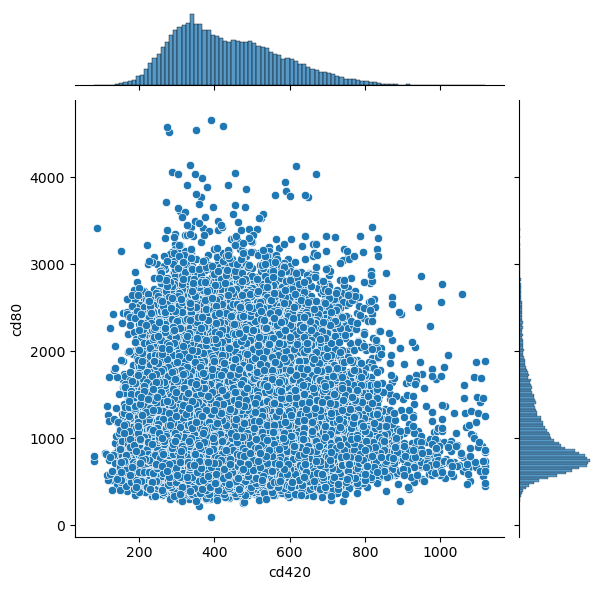

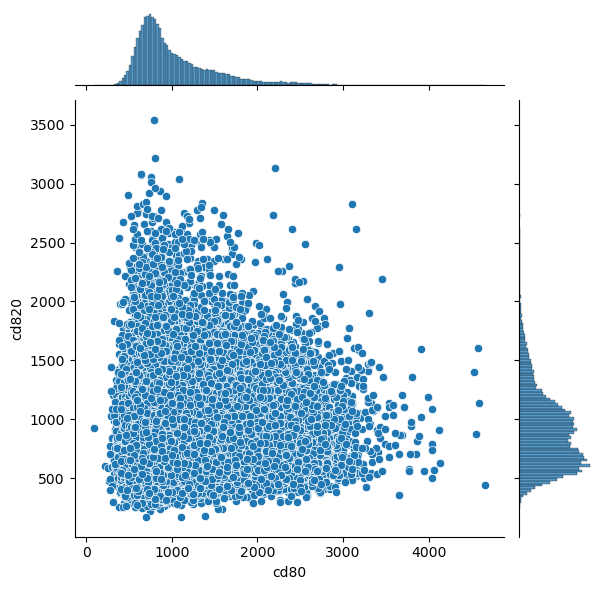

In [12]:
#Analyzing relationship between attributes
col = df.columns
for i in range(len(col)-2):
    sns.jointplot(x=col[i],y=col[i+1],data=df)

time
0
trt
0
age
358
wtkg
2247
hemo
1674
homo
0
drugs
6610
karnof
0
oprior
2115
z30
0
preanti
1621
race
0
gender
7165
str2
0
strat
0
symptom
4173
treat
0
offtrt
0
cd40
189
cd420
388
cd80
2618
cd820
1095
infected
0


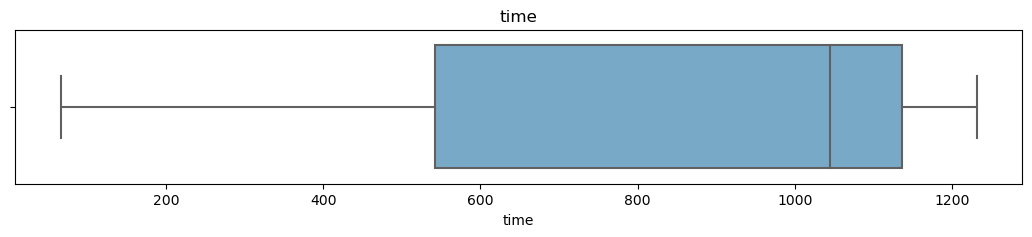

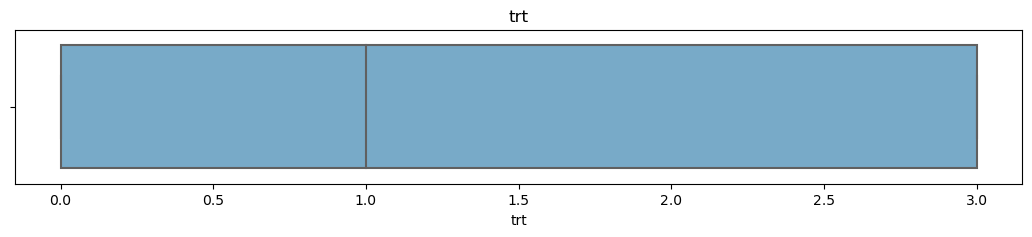

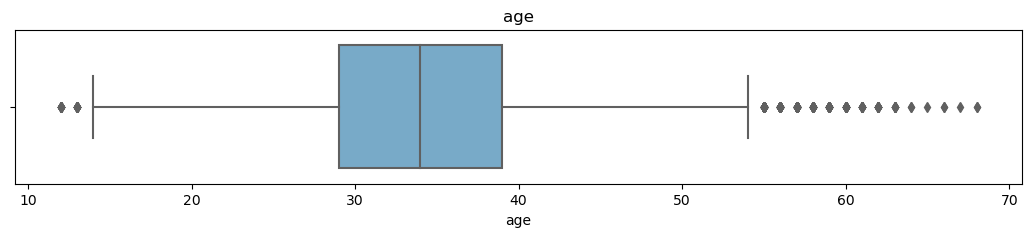

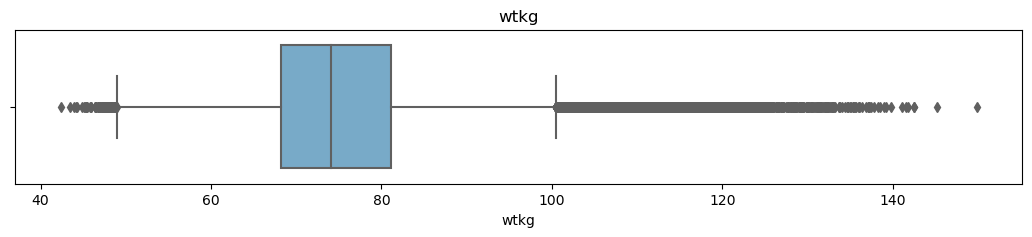

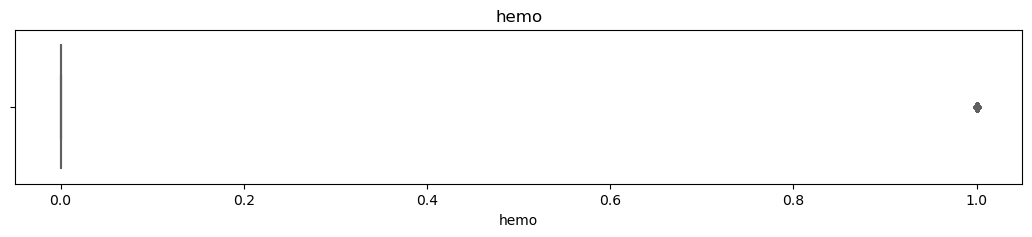

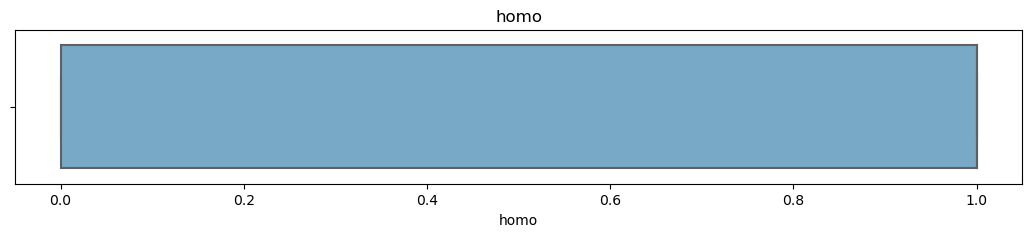

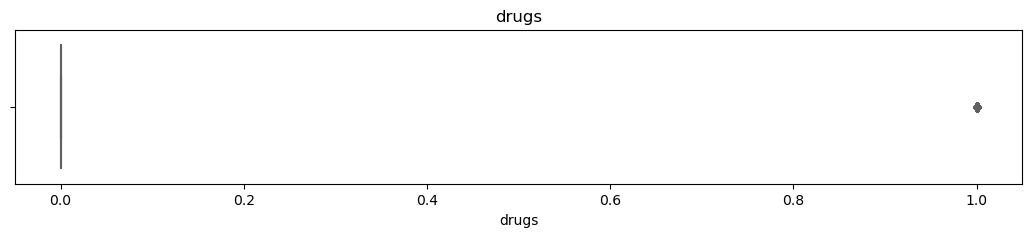

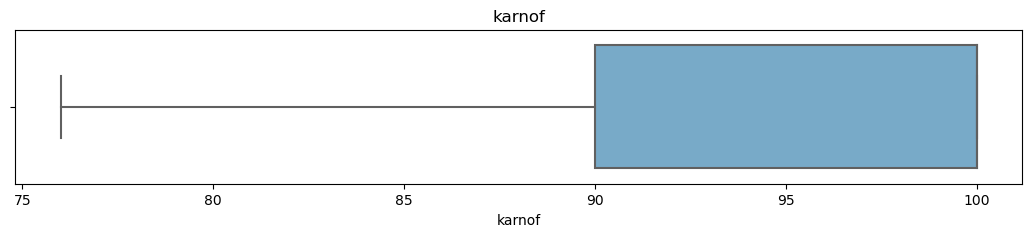

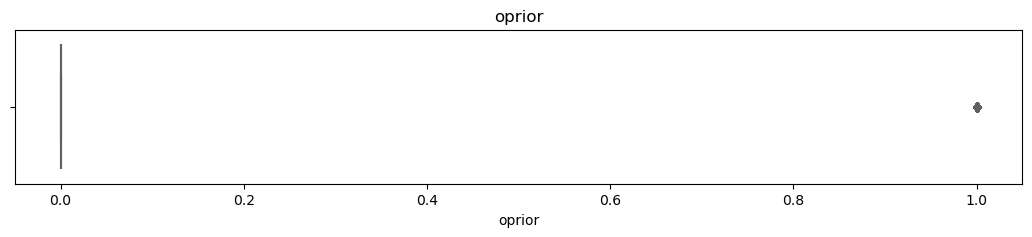

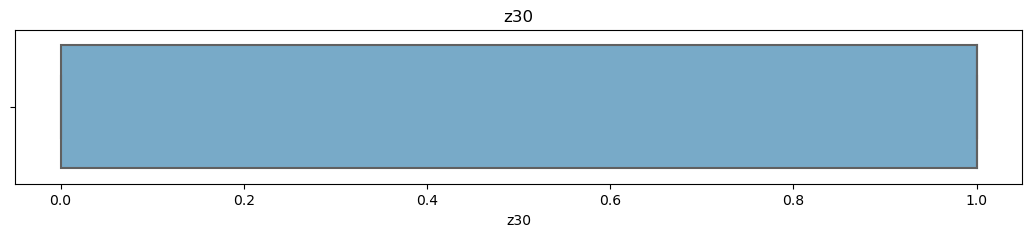

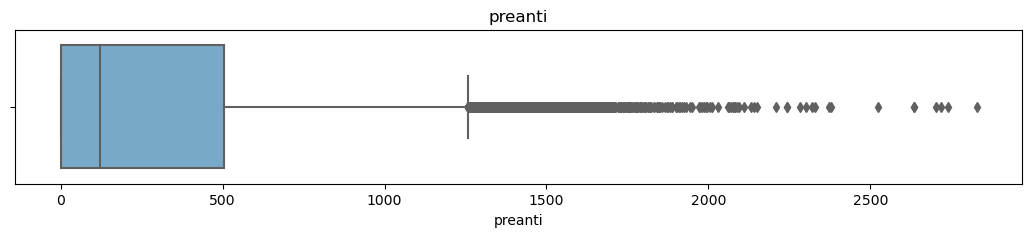

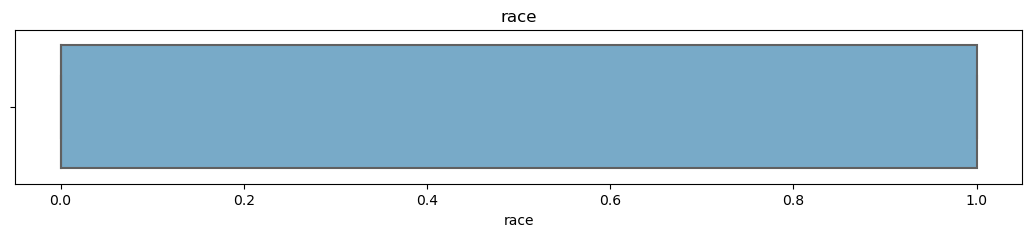

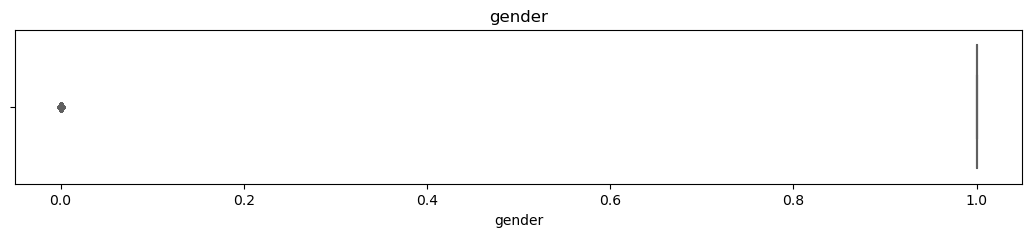

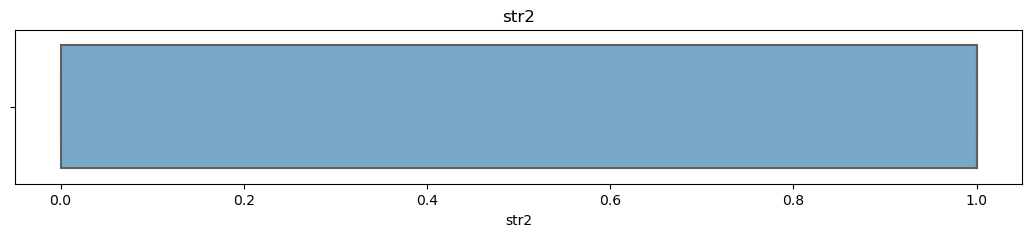

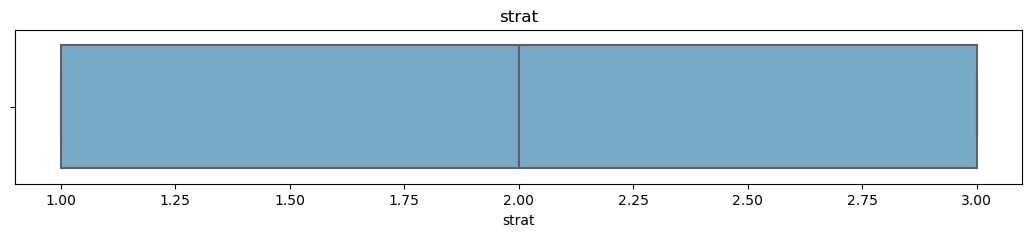

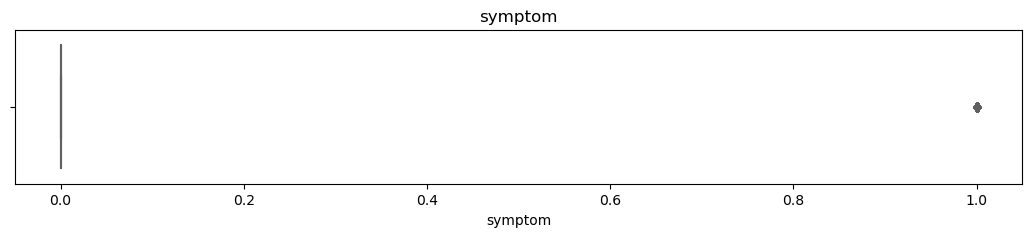

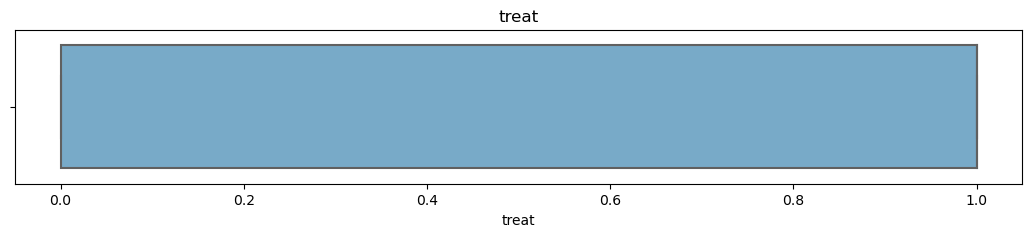

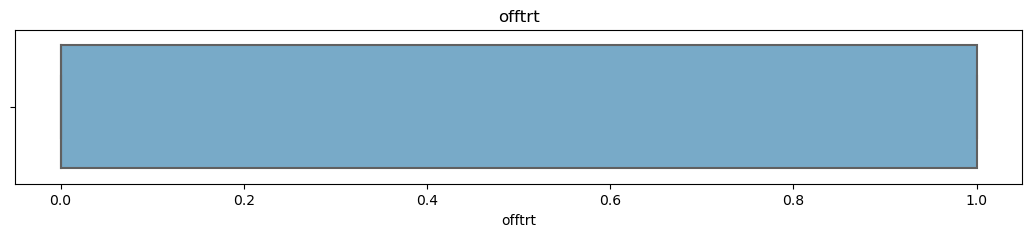

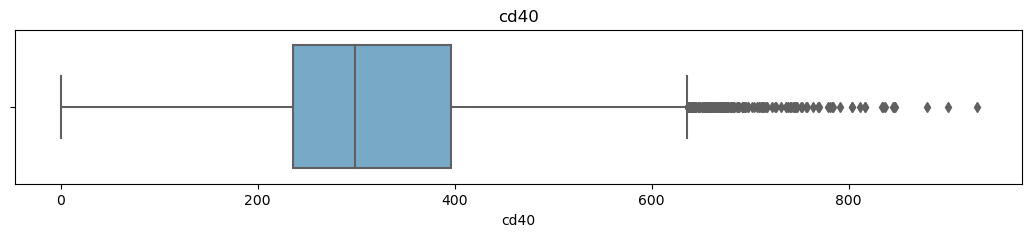

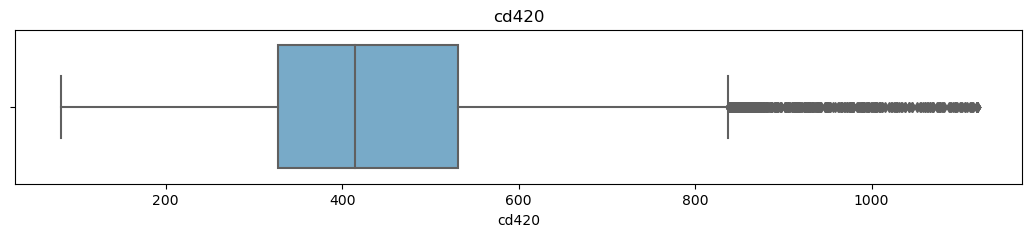

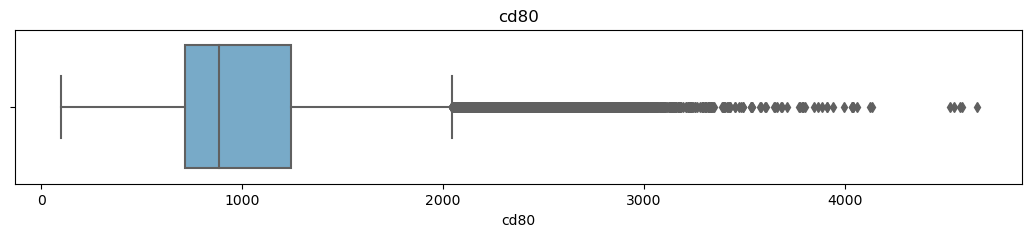

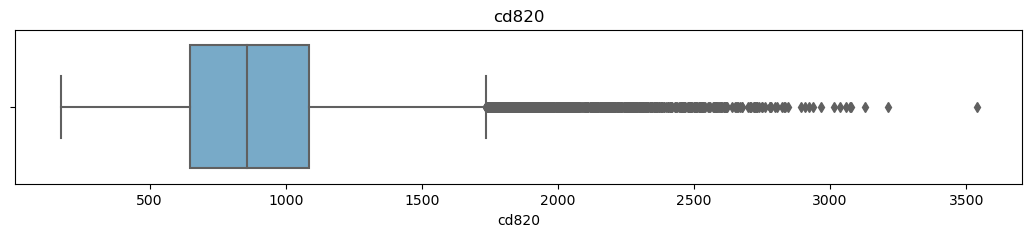

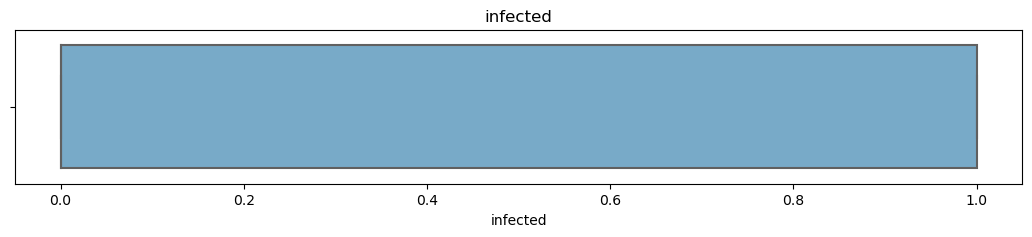

In [13]:
#Finding interquartile range
col = df.columns
for i in col:
    plt.figure(figsize=(13,2))
    sns.boxplot(x=df[i],palette = "Blues")
    plt.title(i)
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
    col = df[i]
    out = col[(col<lb)|(col>ub)]
    print(i)
    print(len(out))


In [14]:
#Removing outlayers
col = ["age","wtkg"]  
for i in col:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
    df1 = df[(df[i] >= lb)&(df[i]<= ub)]
df1.shape

(47753, 23)

In [15]:
#Stanadardizing and Normalization the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtr = df1.drop("infected",axis = True)
ytr = df1["infected"]
xtr.head()
df2 = pd.DataFrame(scaler.fit_transform(xtr))
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.639249,-0.310425,0.397275,0.548794,-0.187512,0.731115,-0.390914,0.624338,-0.210382,0.738854,...,0.410032,0.848651,0.060091,-0.301659,0.601501,-0.721931,0.034522,0.221665,-0.335019,-0.447619
1,-1.795004,-1.121527,-0.166797,-0.136907,-0.187512,0.731115,-0.390914,-1.336845,-0.210382,0.738854,...,0.410032,0.848651,1.177067,3.314997,0.601501,1.385175,-1.469748,0.954809,-0.021948,1.824568
2,-1.239254,-0.310425,1.243383,-0.514369,-0.187512,0.731115,-0.390914,0.624338,-0.210382,0.738854,...,-2.438834,0.848651,-1.056885,-0.301659,-1.662508,-0.721931,0.571762,-0.718973,0.207228,0.536701
3,1.055250,1.311780,1.102365,1.581132,-0.187512,0.731115,-0.390914,0.624338,4.753249,0.738854,...,0.410032,0.848651,1.177067,-0.301659,-1.662508,-0.721931,-0.785989,-0.781221,-0.553965,0.333353
4,-1.015003,0.500678,0.397275,-0.258700,-0.187512,0.731115,-0.390914,-1.336845,-0.210382,0.738854,...,0.410032,0.848651,0.060091,-0.301659,0.601501,1.385175,1.968584,0.733482,-0.625582,-0.624443


In [16]:
#Spliting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df2,ytr, test_size=0.3, random_state=42)
x_test.shape

(14326, 22)

In [17]:
#importing models and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Logistic Regression**

In [64]:
# Ananlysing Logistic Regresion for different iteration values
at = []
ats = []
r = []
for i in range(100,5000,500):
    r.append(i)
    log = LogisticRegression(fit_intercept = True, max_iter=i)
    log.fit(x_train,y_train)
    y_pred = log.predict(x_test)
    y_tpred = log.predict(x_train)
    a_stest = accuracy_score(y_test,y_pred)
    at.append(a_stest)
    a_strain = accuracy_score(y_train,y_tpred)
    ats.append(a_strain)

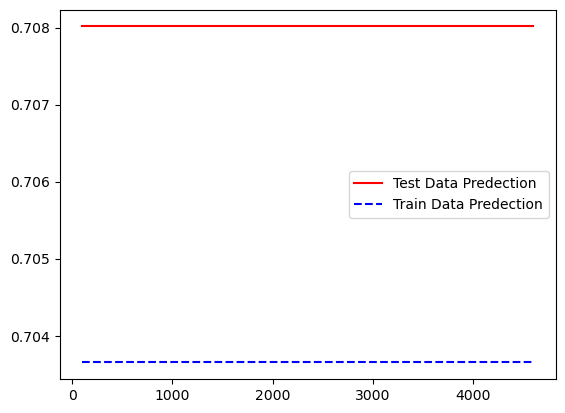

In [65]:
# Plotting accurasy
plt.plot(r,at,'r', label="Test Data Predection")
plt.plot(r,ats,'b--', label = "Train Data Predection")
plt.legend()

In [68]:
# Best Model found
#Logistic Regression
log_best = LogisticRegression(fit_intercept = True, max_iter=600)
log_best.fit(x_train,y_train)
pred_test = log.predict(x_test)
pred_train = log.predict(x_train)
report_test = classification_report(y_test,pred_test)
report_train = classification_report(y_train,pred_train)
cm = confusion_matrix(y_test,pred_test)
print("Report for Test Prediction : \n",report_test)
print("\n Report for Train Predection : \n",report_train)
print("\n Confusion Matrix : \n",cm)

Report for Test Prediction : 
               precision    recall  f1-score   support

           0       0.73      0.92      0.81      9907
           1       0.56      0.23      0.33      4419

    accuracy                           0.71     14326
   macro avg       0.65      0.58      0.57     14326
weighted avg       0.68      0.71      0.66     14326


 Report for Train Predection : 
               precision    recall  f1-score   support

           0       0.72      0.92      0.81     22921
           1       0.57      0.23      0.33     10506

    accuracy                           0.70     33427
   macro avg       0.65      0.58      0.57     33427
weighted avg       0.68      0.70      0.66     33427


 Confusion Matrix : 
 [[9117  790]
 [3393 1026]]


**Decision Tree**

In [42]:
# Decision Tree
train_acc =[]
test_acc=[]
split = []
for i in range(100,10000,500):
    split.append(i)
    dt = DecisionTreeClassifier(random_state =49,min_samples_split=i)
    dt.fit(x_train, y_train)
    pred_test = dt.predict(x_test)
    pred_train = dt.predict(x_train)

    train_acc.append(accuracy_score(pred_train,y_train))
    test_acc.append(accuracy_score(pred_test,y_test))

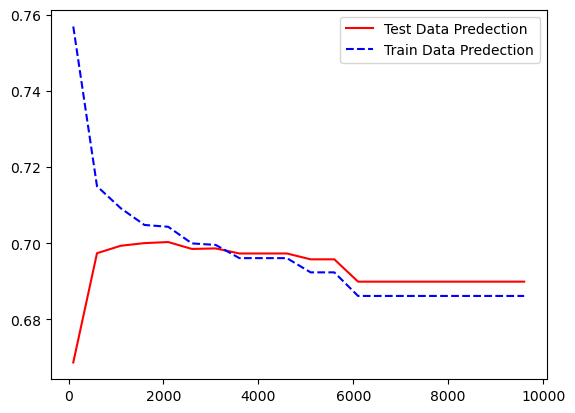

In [43]:
# Plotting accurasy
plt.plot(split,test_acc,'r', label="Test Data Predection")
plt.plot(split,train_acc,'b--', label = "Train Data Predection")
plt.legend()

In [44]:
# Best Model Found
dt = DecisionTreeClassifier(random_state =49,min_samples_split=3000)
dt.fit(x_train, y_train)
pred_test = dt.predict(x_test)
pred_train = dt.predict(x_train)
report_test = classification_report(y_test,pred_test)
report_train = classification_report(y_train,pred_train)
cm = confusion_matrix(y_test,pred_test)
print("Report for Test Prediction : \n",report_test)
print("\n Report for Train Predection : \n",report_train)
print("\n Confusion Matrix : \n",cm)

Report for Test Prediction : 
               precision    recall  f1-score   support

           0       0.71      0.96      0.81      9907
           1       0.55      0.12      0.20      4419

    accuracy                           0.70     14326
   macro avg       0.63      0.54      0.51     14326
weighted avg       0.66      0.70      0.63     14326


 Report for Train Predection : 
               precision    recall  f1-score   support

           0       0.71      0.96      0.81     22921
           1       0.60      0.13      0.21     10506

    accuracy                           0.70     33427
   macro avg       0.66      0.54      0.51     33427
weighted avg       0.67      0.70      0.63     33427


 Confusion Matrix : 
 [[9465  442]
 [3875  544]]


**Random Forest**

In [45]:
# Random Forest 
train_acc=[]
test_acc=[]
esti=[]
for i in range(1,10):
    esti.append(i)
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(x_train,y_train)
    pred_test = rfc.predict(x_test)
    pred_train = rfc.predict(x_train)
    train_acc.append(accuracy_score(pred_train,y_train))
    test_acc.append(accuracy_score(pred_test,y_test))


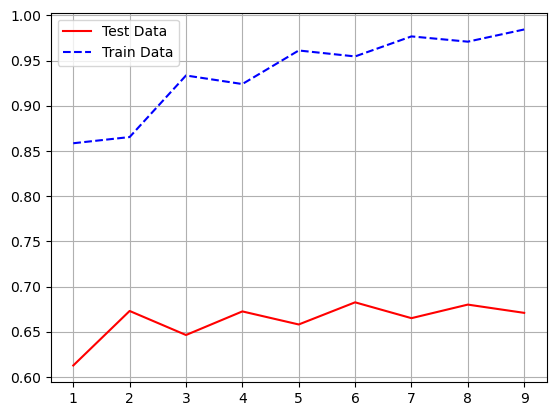

In [46]:
# Plotting accurasy
plt.plot(esti,test_acc,'r',label="Test Data")
plt.plot(esti,train_acc,'b--',label="Train Data")
plt.legend()
plt.grid()

In [50]:
# Best Model Found
rfc = RandomForestClassifier(n_estimators=6)
rfc.fit(x_train,y_train)
pred_test = rfc.predict(x_test)
pred_train = rfc.predict(x_train)
report_test = classification_report(y_test,pred_test)
report_train = classification_report(y_train,pred_train)
cm = confusion_matrix(y_test,pred_test)
print("Report for Test Prediction : \n",report_test)
print("\n Report for Train Predection : \n",report_train)
print("\n Confusion Matrix : \n",cm)

Report for Test Prediction : 
               precision    recall  f1-score   support

           0       0.72      0.89      0.79      9907
           1       0.46      0.21      0.29      4419

    accuracy                           0.68     14326
   macro avg       0.59      0.55      0.54     14326
weighted avg       0.64      0.68      0.64     14326


 Report for Train Predection : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     22921
           1       0.99      0.86      0.92     10506

    accuracy                           0.95     33427
   macro avg       0.97      0.93      0.94     33427
weighted avg       0.96      0.95      0.95     33427


 Confusion Matrix : 
 [[8810 1097]
 [3470  949]]


**Support Vector Machine**

In [47]:
#Support vex=ctor Machine
svc = SVC(kernel = 'rbf', C=1.0, gamma='scale')
svc.fit(x_train,y_train)
pred_test = svc.predict(x_test)
pred_train = svc.predict(x_train)
report_test = classification_report(y_test,pred_test)
report_train = classification_report(y_train,pred_train)
cm = confusion_matrix(y_test,pred_test)
print("Report for Test Prediction : \n",report_test)
print("\n Report for Train Predection : \n",report_train)
print("\n Confusion Matrix : \n",cm)

Report for Test Prediction : 
               precision    recall  f1-score   support

           0       0.72      0.95      0.82      9907
           1       0.60      0.17      0.27      4419

    accuracy                           0.71     14326
   macro avg       0.66      0.56      0.54     14326
weighted avg       0.68      0.71      0.65     14326


 Report for Train Predection : 
               precision    recall  f1-score   support

           0       0.73      0.96      0.83     22921
           1       0.71      0.21      0.32     10506

    accuracy                           0.73     33427
   macro avg       0.72      0.59      0.58     33427
weighted avg       0.72      0.73      0.67     33427


 Confusion Matrix : 
 [[9399  508]
 [3665  754]]


**K-Nearest Neighbors**

In [ ]:
# K-Nearest Neighbours
train_acc=[]
test_acc=[]
n=[]
for i in range(1,5):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    pred_test = knn.predict(x_test)
    pred_train = knn.predict(x_train)
    train_acc.append(accuracy_score(pred_train,y_train))
    test_acc.append(accuracy_score(pred_test,y_test))
    n.append(i)
    

[0.6738561407182494, 0.6738561407182494, 0.6738561407182494, 0.6738561407182494]


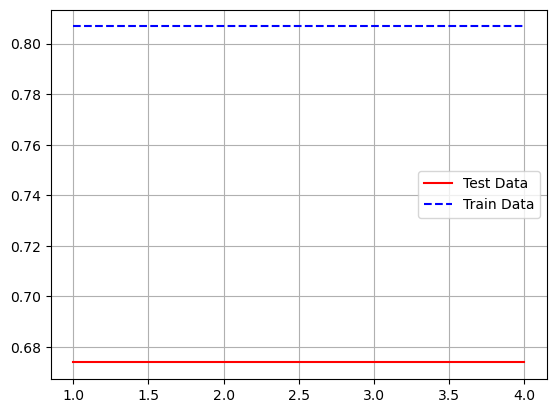

In [37]:
# Plotting accurasy
plt.plot(n,test_acc,'r',label="Test Data")
plt.plot(n,train_acc,'b--',label="Train Data")
plt.legend()
plt.grid()
print(test_acc)

In [17]:
# Best Model Found
knn = KNeighborsClassifier(3)
knn.fit(x_train,y_train)
pred_test = knn.predict(x_test)
pred_train = knn.predict(x_train)
report_test = classification_report(y_test,pred_test)
report_train = classification_report(y_train,pred_train)
cm = confusion_matrix(y_test,pred_test)
print("Report for Test Prediction : \n",report_test)
print("\n Report for Train Predection : \n",report_train)
print("\n Confusion Matrix : \n",cm)

Report for Test Prediction : 
               precision    recall  f1-score   support

           0       0.73      0.79      0.76      9907
           1       0.42      0.35      0.38      4419

    accuracy                           0.65     14326
   macro avg       0.58      0.57      0.57     14326
weighted avg       0.64      0.65      0.64     14326


 Report for Train Predection : 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86     22921
           1       0.73      0.60      0.66     10506

    accuracy                           0.80     33427
   macro avg       0.78      0.75      0.76     33427
weighted avg       0.80      0.80      0.80     33427


 Confusion Matrix : 
 [[7827 2080]
 [2893 1526]]


In [53]:
# XGB Classifier
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    max_depth=4,
    eta=0.3,
    subsample=0.7,
    colsample_bytree=0.7
)
xgb.fit(x_train, y_train)
pred_test = xgb.predict(x_test)
pred_train = xgb.predict(x_train)
report_test = classification_report(y_test,pred_test)
report_train = classification_report(y_train,pred_train)
cm = confusion_matrix(y_test,pred_test)
print("Report for Test Prediction : \n",report_test)
print("\n Report for Train Predection : \n",report_train)
print("\n Confusion Matrix : \n",cm)

Report for Test Prediction : 
               precision    recall  f1-score   support

           0       0.74      0.90      0.81      9907
           1       0.56      0.27      0.36      4419

    accuracy                           0.71     14326
   macro avg       0.65      0.59      0.59     14326
weighted avg       0.68      0.71      0.67     14326


 Report for Train Predection : 
               precision    recall  f1-score   support

           0       0.76      0.93      0.84     22921
           1       0.70      0.34      0.46     10506

    accuracy                           0.75     33427
   macro avg       0.73      0.64      0.65     33427
weighted avg       0.74      0.75      0.72     33427


 Confusion Matrix : 
 [[8959  948]
 [3229 1190]]


**Hyper Parameter Tuning Using Grid Search**

In [19]:
from sklearn.model_selection import GridSearchCV

**(i)Logistic Regression**

In [69]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
model = LogisticRegression()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Parameters : \n",best_params)
print("Score : \n",best_score)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Parameters : 
 {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Score : 
 0.7026953159696268


In [72]:
model = LogisticRegression(C= 0.01, penalty= 'l1', solver= 'liblinear')
model.fit(x_test,y_test)
pred_test = model.predict(x_test)
pred_train = model.predict(x_train)
report_test = classification_report(y_test,pred_test)
report_train = classification_report(y_train,pred_train)
cm = confusion_matrix(y_test,pred_test)
print("Report for Test Prediction : \n",report_test)
print("\n Report for Train Predection : \n",report_train)
print("\n Confusion Matrix : \n",cm)

Report for Test Prediction : 
               precision    recall  f1-score   support

           0       0.72      0.94      0.82      9907
           1       0.59      0.18      0.28      4419

    accuracy                           0.71     14326
   macro avg       0.66      0.56      0.55     14326
weighted avg       0.68      0.71      0.65     14326


 Report for Train Predection : 
               precision    recall  f1-score   support

           0       0.71      0.94      0.81     22921
           1       0.59      0.18      0.27     10506

    accuracy                           0.70     33427
   macro avg       0.65      0.56      0.54     33427
weighted avg       0.67      0.70      0.64     33427


 Confusion Matrix : 
 [[9350  557]
 [3611  808]]


**(ii)Decision Tree**

In [74]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],          
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [200, 500, 10,50],
    'max_features': [None, 'sqrt', 'log2']  
}
model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Parameters : \n",best_params)
print("Score : \n",best_score)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Parameters : 
 {'criterion': 'entropy', 'max_depth': 30, 'max_features': None, 'min_samples_split': 500, 'splitter': 'random'}
Score : 
 0.6971011441539058


In [81]:
model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 30, max_features= None, min_samples_split= 500, splitter = "random")


model.fit(x_test,y_test)
pred_test = model.predict(x_test)
pred_train = model.predict(x_train)
report_test = classification_report(y_test,pred_test)
report_train = classification_report(y_train,pred_train)
cm = confusion_matrix(y_test,pred_test)
print("Report for Test Prediction : \n",report_test)
print("\n Report for Train Predection : \n",report_train)
print("\n Confusion Matrix : \n",cm)

Report for Test Prediction : 
               precision    recall  f1-score   support

           0       0.72      0.95      0.82      9907
           1       0.61      0.17      0.26      4419

    accuracy                           0.71     14326
   macro avg       0.66      0.56      0.54     14326
weighted avg       0.68      0.71      0.65     14326


 Report for Train Predection : 
               precision    recall  f1-score   support

           0       0.71      0.94      0.81     22921
           1       0.54      0.15      0.23     10506

    accuracy                           0.69     33427
   macro avg       0.62      0.54      0.52     33427
weighted avg       0.65      0.69      0.63     33427


 Confusion Matrix : 
 [[9427  480]
 [3683  736]]


**(iii)Random Forest**

In [20]:
param_grid = {
    'n_estimators': [1, 10, 15],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10,50],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
model = RandomForestClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Parameters : \n",best_params)
print("Score : \n",best_score)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Parameters : 
 {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 50, 'n_estimators': 15}
Score : 
 0.7045203464925538


In [21]:
model = RandomForestClassifier(bootstrap = False, max_depth = 10, max_features = 'sqrt', min_samples_leaf= 4, min_samples_split =  50, n_estimators= 15)


model.fit(x_test,y_test)
pred_test = model.predict(x_test)
pred_train = model.predict(x_train)
report_test = classification_report(y_test,pred_test)
report_train = classification_report(y_train,pred_train)
cm = confusion_matrix(y_test,pred_test)
print("Report for Test Prediction : \n",report_test)
print("\n Report for Train Predection : \n",report_train)
print("\n Confusion Matrix : \n",cm)

Report for Test Prediction : 
               precision    recall  f1-score   support

           0       0.75      0.97      0.85      9907
           1       0.81      0.28      0.42      4419

    accuracy                           0.76     14326
   macro avg       0.78      0.63      0.63     14326
weighted avg       0.77      0.76      0.71     14326


 Report for Train Predection : 
               precision    recall  f1-score   support

           0       0.71      0.94      0.81     22921
           1       0.58      0.18      0.28     10506

    accuracy                           0.70     33427
   macro avg       0.65      0.56      0.55     33427
weighted avg       0.67      0.70      0.64     33427


 Confusion Matrix : 
 [[9605  302]
 [3170 1249]]


**(iv)Support Vector Machine**

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

model = SVC()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Parameters : \n",best_params)
print("Score : \n",best_score)